# Data prepation

In [1]:
import pandas as pd

In [2]:
clients = pd.read_csv('clients2.csv',
                     index_col='client_id',
                     parse_dates=['first_issue_date', 'first_redeem_date'],
                     na_values={'gender': 'U'})\
    .drop(columns='client_id.1')
clients

,first_issue_date,first_redeem_date,age,gender
client_id,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45,NaN
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72,F
00010925a5,2018-07-24 16:21:29,2018-09-14 16:12:49,83,NaN
0001f552b0,2017-06-30 19:20:38,2018-08-28 12:59:45,33,F
00020e7b18,2017-11-27 11:41:45,2018-01-10 17:50:05,73,NaN
...,...,...,...,...
fffe0abb97,2017-11-27 08:56:54,2018-02-11 09:26:08,35,F
fffe0ed719,2017-09-15 08:53:24,2017-12-12 14:50:12,69,NaN
fffea1204c,2018-01-31 16:59:37,2018-03-12 17:02:27,73,F


# Age

There are negative values and values above 100 (as high as 1852).

Calculate mean age using clients within reasonable age range:

In [3]:
mean_age = clients.loc[(clients.age < 90) & (clients.age > 10), 'age'].mean()
mean_age

46.37953291808248

In [4]:
clients.loc[(clients.age > 90) | (clients.age < 10), 'age'] = mean_age

In [5]:
clients.age.describe()

count    200039.000000
mean         46.379892
std          15.858605
min          10.000000
25%          34.000000
50%          45.000000
75%          59.000000
max          90.000000
Name: age, dtype: float64

<AxesSubplot: ylabel='Density'>

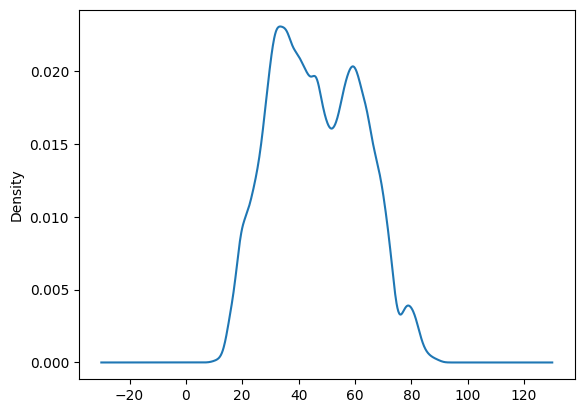

In [6]:
clients.age.plot.kde()

# Gender

In [7]:
clients = pd.get_dummies(clients, columns=['gender'])
clients

,first_issue_date,first_redeem_date,age,gender_F,gender_M
client_id,,,,,
000012768d,2017-08-05 15:40:48,2018-01-04 19:30:07,45.0,0,0
000036f903,2017-04-10 13:54:23,2017-04-23 12:37:56,72.0,1,0
00010925a5,2018-07-24 16:21:29,2018-09-14 16:12:49,83.0,0,0
0001f552b0,2017-06-30 19:20:38,2018-08-28 12:59:45,33.0,1,0
00020e7b18,2017-11-27 11:41:45,2018-01-10 17:50:05,73.0,0,0
...,...,...,...,...,...
fffe0abb97,2017-11-27 08:56:54,2018-02-11 09:26:08,35.0,1,0
fffe0ed719,2017-09-15 08:53:24,2017-12-12 14:50:12,69.0,0,0
fffea1204c,2018-01-31 16:59:37,2018-03-12 17:02:27,73.0,1,0


# Issue and redeem dates

## Clients that have not redeemed

In [8]:
clients['no_redeem'] = clients.first_redeem_date.isna().astype('int')

In [9]:
clients.isna().sum()

first_issue_date         0
first_redeem_date    17546
age                      0
gender_F                 0
gender_M                 0
no_redeem                0
dtype: int64

In [10]:
clients.loc[clients.no_redeem == 1, :]

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
00068fd5dc,2018-12-15 11:14:26,NaT,72.000000,1,0,1
0006fca4bf,2019-02-20 10:47:30,NaT,57.000000,0,0,1
0009e6bafa,2018-10-01 18:40:29,NaT,32.000000,0,0,1
000d599743,2018-08-29 09:08:39,NaT,46.379533,0,0,1
00140e5d34,2019-03-07 13:10:31,NaT,50.000000,1,0,1
...,...,...,...,...,...,...
ffe2d2bdbc,2018-02-16 12:06:15,NaT,82.000000,0,0,1
ffe4b6aa1a,2019-01-19 19:01:44,NaT,56.000000,0,0,1
fff2b6bf63,2018-10-18 19:01:34,NaT,46.000000,0,0,1


## Use the last redeem date to fill missing values

In [11]:
last_redeem = clients.first_redeem_date.max(); last_redeem

Timestamp('2019-11-20 01:14:10')

In [12]:
clients.fillna(last_redeem, inplace=True)

In [13]:
clients.isna().sum()

first_issue_date     0
first_redeem_date    0
age                  0
gender_F             0
gender_M             0
no_redeem            0
dtype: int64

In [14]:
clients['first_issue_date'] = (clients['first_issue_date'] - pd.Timestamp("1970-01-01")).dt.days
clients['first_redeem_date'] = (clients['first_redeem_date'] - pd.Timestamp("1970-01-01")).dt.days
clients

,first_issue_date,first_redeem_date,age,gender_F,gender_M,no_redeem
client_id,,,,,,
000012768d,17383,17535,45.0,0,0,0
000036f903,17266,17279,72.0,1,0,0
00010925a5,17736,17788,83.0,0,0,0
0001f552b0,17347,17771,33.0,1,0,0
00020e7b18,17497,17541,73.0,0,0,0
...,...,...,...,...,...,...
fffe0abb97,17497,17573,35.0,1,0,0
fffe0ed719,17424,17512,69.0,0,0,0
fffea1204c,17562,17602,73.0,1,0,0


In [15]:
clients.to_csv('clients2_modified.csv')

# Adding aggregated purchase data

In [16]:
train_purch = pd.read_csv('train_purch.csv', parse_dates=['transaction_datetime'])
train_purch

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,9a80204f78,2.0,80.0,NaN
1,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,da89ebd374,1.0,65.0,NaN
2,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,0a95e1151d,1.0,24.0,NaN
3,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,4055b15e4a,2.0,50.0,NaN
4,000012768d,7e3e2e3984,2018-12-01 07:12:45,10.0,0.0,0.0,0.0,1007.0,54a4a11a29,a685f1916b,1.0,22.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15998947,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,de437430e2,1.0,19.0,NaN
15998948,fffeca6d22,a0bb11a968,2019-03-09 07:47:43,0.4,0.0,0.0,0.0,99.0,a0613e36b5,ad8fee4200,1.0,45.0,NaN
15998949,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,ad8fee4200,2.0,94.0,NaN
15998950,fffeca6d22,3b876a5532,2019-03-15 14:46:39,0.8,0.0,0.0,0.0,165.0,a0613e36b5,230dbb0c16,1.0,50.0,NaN


In [17]:
train_purch.columns

Index(['client_id', 'transaction_id', 'transaction_datetime',
       'regular_points_received', 'express_points_received',
       'regular_points_spent', 'express_points_spent', 'purchase_sum',
       'store_id', 'product_id', 'product_quantity', 'trn_sum_from_iss',
       'trn_sum_from_red'],
      dtype='object')

In [18]:
train_purch = train_purch\
    .groupby(['client_id','transaction_id'])\
    .agg({'regular_points_received': 'mean',
          'express_points_received': 'mean',
          'regular_points_spent': 'mean', 
          'express_points_spent': 'mean', 
          'purchase_sum': 'mean'})\
    .reset_index()\
    .groupby('client_id')\
    .agg({'regular_points_received': ['mean', 'sum'],
          'express_points_received': ['mean', 'sum'],
          'regular_points_spent': ['mean', 'sum'], 
          'express_points_spent': ['mean', 'sum'], 
          'purchase_sum': ['mean', 'sum']})
train_purch

regular_points_received        express_points_received        \
                              mean    sum                    mean   sum   
client_id                                                                 
000012768d                6.425000   25.7                   0.000   0.0   
000036f903                1.715625   54.9                   1.875  60.0   
0001f552b0                5.260000   78.9                   0.000   0.0   
00020e7b18               15.894444  286.1                   0.000   0.0   
000220a0a7                6.940000  104.1                   0.000   0.0   
...                            ...    ...                     ...   ...   
fffd5cd0c6                1.950000   35.1                   0.000   0.0   
fffd63dfe3                1.625000    6.5                   0.000   0.0   
fffd8c9d7d                2.200000   11.0                   0.000   0.0   
fffe0abb97                2.466667   22.2                   0.000   0.0   
fffeca6d22                2.962500   47.4                   0.000   0.0   

           regular_points_spent        express_points_spent         \
                           mean    sum                 mean    sum   
client_id                                                            
000012768d             0.000000    0.0             0.000000    0.0   
000036f903             0.000000    0.0             0.000000    0.0   
0001f552b0             0.000000    0.0             0.000000    0.0   
00020e7b18           -32.888889 -592.0            -1.666667  -30.0   
000220a0a7             0.000000    0.0             0.000000    0.0   
...                         ...    ...                  ...    ...   
fffd5cd0c6             0.000000    0.0             0.000000    0.0   
fffd63dfe3             0.000000    0.0             0.000000    0.0   
fffd8c9d7d             0.000000    0.0             0.000000    0.0   
fffe0abb97            -2.888889  -26.0           -16.666667 -150.0   
fffeca6d22             0.000000    0.0             0.000000    0.0   

           purchase_sum            
                   mean       sum  
client_id                          
000012768d   700.750000   2803.00  
000036f903   306.406250   9805.00  
0001f552b0   410.345333   6155.18  
00020e7b18  1434.422778  25819.61  
000220a0a7   573.771333   8606.57  
...                 ...       ...  
fffd5cd0c6   318.423889   5731.63  
fffd63dfe3   335.127500   1340.51  
fffd8c9d7d   327.306000   1636.53  
fffe0abb97   301.824444   2716.42  
fffeca6d22   177.053750   2832.86  

[140027 rows x 10 columns]

In [19]:
train_purch.columns =\
    ['regular_points_received_mean', 
    'regular_points_received_sum',
    'express_points_received_mean',
    'express_points_received_sum',
    'regular_points_spent_mean',
    'regular_points_spent_sum', 
    'express_points_spent_mean',
    'express_points_spent_sum', 
    'purchase_mean',
     'purchase_sum']
train_purch

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum
client_id,,,,,,,,,,
000012768d,6.425000,25.7,0.000,0.0,0.000000,0.0,0.000000,0.0,700.750000,2803.00
000036f903,1.715625,54.9,1.875,60.0,0.000000,0.0,0.000000,0.0,306.406250,9805.00
0001f552b0,5.260000,78.9,0.000,0.0,0.000000,0.0,0.000000,0.0,410.345333,6155.18
00020e7b18,15.894444,286.1,0.000,0.0,-32.888889,-592.0,-1.666667,-30.0,1434.422778,25819.61
000220a0a7,6.940000,104.1,0.000,0.0,0.000000,0.0,0.000000,0.0,573.771333,8606.57
...,...,...,...,...,...,...,...,...,...,...
fffd5cd0c6,1.950000,35.1,0.000,0.0,0.000000,0.0,0.000000,0.0,318.423889,5731.63
fffd63dfe3,1.625000,6.5,0.000,0.0,0.000000,0.0,0.000000,0.0,335.127500,1340.51
fffd8c9d7d,2.200000,11.0,0.000,0.0,0.000000,0.0,0.000000,0.0,327.306000,1636.53


In [20]:
train_purch.join(clients, how='left')\
    .to_csv('clients_train_modified.csv')

# Same for the test set

In [21]:
test_purch = pd.read_csv('test_purch.csv', parse_dates=['transaction_datetime'])
test_purch

,client_id,transaction_id,transaction_datetime,regular_points_received,express_points_received,regular_points_spent,express_points_spent,purchase_sum,store_id,product_id,product_quantity,trn_sum_from_iss,trn_sum_from_red
0,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,a375a035b9,2.0,50.0,NaN
1,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,6f9e02ee36,1.0,90.0,NaN
2,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,42e1eb8d23,1.0,20.0,NaN
3,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,5c6de3010f,2.0,85.0,NaN
4,00010925a5,e91ffe5b50,2018-11-25 10:56:18,1.5,0.0,0.0,0.0,303.0,76d287ce03,343e841aaa,1.0,58.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6883733,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,24d5a54f42,1.0,164.0,NaN
6883734,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,7427d0830d,1.0,134.0,NaN
6883735,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,6c547c2ca8,1.0,60.0,NaN
6883736,fffff6ce77,48f6d115ce,2019-03-15 17:47:02,6.7,0.0,0.0,0.0,676.0,5ec64bdccb,d04e7a8338,1.0,48.0,NaN


In [22]:
test_purch = test_purch\
    .groupby(['client_id','transaction_id'])\
    .agg({'regular_points_received': 'mean',
          'express_points_received': 'mean',
          'regular_points_spent': 'mean', 
          'express_points_spent': 'mean', 
          'purchase_sum': 'mean'})\
    .reset_index()\
    .groupby('client_id')\
    .agg({'regular_points_received': ['mean', 'sum'],
          'express_points_received': ['mean', 'sum'],
          'regular_points_spent': ['mean', 'sum'], 
          'express_points_spent': ['mean', 'sum'], 
          'purchase_sum': ['mean', 'sum']})
test_purch

regular_points_received        express_points_received       \
                              mean    sum                    mean  sum   
client_id                                                                
00010925a5                1.766667   31.8                     0.0  0.0   
00035a21d9                7.866667   23.6                     0.0  0.0   
00038f9200                1.725000   82.8                     0.0  0.0   
0004315e57                4.842857   67.8                     0.0  0.0   
0006fca4bf               11.800000   35.4                     0.0  0.0   
...                            ...    ...                     ...  ...   
fff9aa288c                4.210000   42.1                     0.0  0.0   
fff9f772f6               23.975000   95.9                     0.0  0.0   
fffe0ed719                2.330000   69.9                     0.0  0.0   
fffea1204c                1.535294   26.1                     0.0  0.0   
fffff6ce77                6.915625  221.3                     0.0  0.0   

           regular_points_spent        express_points_spent        \
                           mean    sum                 mean   sum   
client_id                                                           
00010925a5            -0.944444  -17.0             0.000000   0.0   
00035a21d9            -2.666667   -8.0           -10.000000 -30.0   
00038f9200            -0.604167  -29.0             0.000000   0.0   
0004315e57            -2.785714  -39.0            -4.285714 -60.0   
0006fca4bf             0.000000    0.0             0.000000   0.0   
...                         ...    ...                  ...   ...   
fff9aa288c            -4.600000  -46.0             0.000000   0.0   
fff9f772f6             0.000000    0.0             0.000000   0.0   
fffe0ed719             0.000000    0.0             0.000000   0.0   
fffea1204c            -2.352941  -40.0             0.000000   0.0   
fffff6ce77            -9.437500 -302.0             0.000000   0.0   

           purchase_sum            
                   mean       sum  
client_id                          
00010925a5   326.833333   5883.00  
00035a21d9   597.313333   1791.94  
00038f9200   174.687500   8385.00  
0004315e57   542.142857   7590.00  
0006fca4bf   713.666667   2141.00  
...                 ...       ...  
fff9aa288c   494.211000   4942.11  
fff9f772f6  1563.815000   6255.26  
fffe0ed719   347.249333  10417.48  
fffea1204c   252.771765   4297.12  
fffff6ce77   580.018438  18560.59  

[60012 rows x 10 columns]

In [23]:
test_purch.columns =\
    ['regular_points_received_mean', 
    'regular_points_received_sum',
    'express_points_received_mean',
    'express_points_received_sum',
    'regular_points_spent_mean',
    'regular_points_spent_sum', 
    'express_points_spent_mean',
    'express_points_spent_sum', 
    'purchase_mean',
     'purchase_sum']
test_purch

,regular_points_received_mean,regular_points_received_sum,express_points_received_mean,express_points_received_sum,regular_points_spent_mean,regular_points_spent_sum,express_points_spent_mean,express_points_spent_sum,purchase_mean,purchase_sum
client_id,,,,,,,,,,
00010925a5,1.766667,31.8,0.0,0.0,-0.944444,-17.0,0.000000,0.0,326.833333,5883.00
00035a21d9,7.866667,23.6,0.0,0.0,-2.666667,-8.0,-10.000000,-30.0,597.313333,1791.94
00038f9200,1.725000,82.8,0.0,0.0,-0.604167,-29.0,0.000000,0.0,174.687500,8385.00
0004315e57,4.842857,67.8,0.0,0.0,-2.785714,-39.0,-4.285714,-60.0,542.142857,7590.00
0006fca4bf,11.800000,35.4,0.0,0.0,0.000000,0.0,0.000000,0.0,713.666667,2141.00
...,...,...,...,...,...,...,...,...,...,...
fff9aa288c,4.210000,42.1,0.0,0.0,-4.600000,-46.0,0.000000,0.0,494.211000,4942.11
fff9f772f6,23.975000,95.9,0.0,0.0,0.000000,0.0,0.000000,0.0,1563.815000,6255.26
fffe0ed719,2.330000,69.9,0.0,0.0,0.000000,0.0,0.000000,0.0,347.249333,10417.48


In [24]:
test_purch.join(clients, how='left')\
    .to_csv('clients_test_modified.csv')